In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import the data
data = pd.read_csv('data.csv')

# look at the first few rows
data.head()

,id,yield,variety,year,site
0,71,14.43333,Glabron,1932,Grand Rapids
1,113,15.23333,No. 475,1932,Grand Rapids
2,77,16.63333,Svansota,1932,Grand Rapids
3,95,19.46667,No. 457,1932,Grand Rapids
4,53,19.70000,No. 475,1931,Grand Rapids


In [4]:
# data type for each column
data.dtypes

id           int64
yield      float64
variety     object
year         int64
site        object
dtype: object

In [5]:
# count number of unique values in each column
data.nunique()

id         120
yield      114
variety     10
year         2
site         6
dtype: int64

In [6]:
# pivot table to show average yield in each year
year = pd.pivot_table(data, values = 'yield', index = ['year'],  aggfunc=np.mean)
year.round(2)

,yield
year,
1931,37.08
1932,31.76


In [7]:
# pivot table to show average yield in each year by variety
variety = pd.pivot_table(data, values = 'yield', index = ['variety'], columns = 'year',  aggfunc=np.mean)
variety.round(2)

year,1931,1932
variety,,
Glabron,37.33,29.36
Manchuria,34.19,28.73
No. 457,40.25,31.44
No. 462,39.06,31.70
No. 475,31.82,31.71
Peatland,36.58,31.78
Svansota,34.01,26.74
Trebi,42.47,36.33
Velvet,34.49,31.63


In [8]:
# pivot table to show average yield in each year by site
site = pd.pivot_table(data, values = 'yield', index = ['site'], columns = 'year',  aggfunc=np.mean)
site.round(2)

year,1931,1932
site,,
Crookston,43.66,31.18
Duluth,30.29,25.70
Grand Rapids,29.05,20.81
Morris,29.29,41.51
University Farm,35.83,29.51
Waseca,54.35,41.87


In [9]:
# pivot table to show average yield in each year by site & variety
sitevar = pd.pivot_table(data, values = 'yield', index = ['site','variety'], columns = 'year',  aggfunc=np.mean)
sitevar.round(2)

year                               1931   1932
site            variety                       
Crookston       Glabron           38.13  26.17
                Manchuria         39.93  32.97
                No. 457           45.67  34.33
                No. 462           48.57  30.53
                No. 475           44.10  32.13
                Peatland          41.60  25.23
                Svansota          40.47  20.63
                Trebi             46.93  41.83
                Velvet            41.33  32.07
                Wisconsin No. 38  49.87  35.90
Duluth          Glabron           29.67  25.87
                Manchuria         28.97  22.57
                No. 457           33.60  22.70
                No. 462           28.10  22.50
                No. 475           33.07  27.37
                Peatland          32.00  31.37
                Svansota          25.70  22.23
                Trebi             33.93  30.60
                Velvet            26.30  22.47
                Wisconsin No. 38  31.60  29.33
Grand Rapids    Glabron           29.13  14.43
                Manchuria         32.97  22.13
                No. 457           32.17  19.47
                No. 462           24.93  19.90
                No. 475           19.70  15.23
                Peatland          34.70  26.77
                Svansota          29.67  16.63
                Trebi             29.77  20.63
                Velvet            23.03  32.23
                Wisconsin No. 38  34.47  20.67
Morris          Glabron           28.77  35.13
                Manchuria         27.43  34.37
                No. 457           28.70  43.53
                No. 462           30.37  47.00
                No. 475           22.60  44.23
                Peatland          29.87  43.20
                Svansota          25.77  35.03
                Trebi             43.77  46.63
                Velvet            26.13  38.83
                Wisconsin No. 38  29.47  47.17
University Farm Glabron           43.07  36.80
                Manchuria         27.00  26.90
                No. 457           43.27  26.43
                No. 462           36.60  25.57
                No. 475           24.67  30.00
                Peatland          32.77  28.07
                Svansota          35.13  27.43
                Trebi             36.57  29.07
                Velvet            39.90  26.80
                Wisconsin No. 38  39.30  38.00
Waseca          Glabron           55.20  37.73
                Manchuria         48.87  33.47
                No. 457           58.10  42.20
                No. 462           65.77  44.70
                No. 475           46.77  41.27
                Peatland          48.57  36.03
                Svansota          47.33  38.50
                Trebi             63.83  49.23
                Velvet            50.23  37.40
                Wisconsin No. 38  58.80  58.17

In [62]:
# define the sort orders for plotting
year_order = np.sort(data.year.unique())
variety_order = np.sort(data.variety.unique())
site_order = np.sort(data.site.unique())

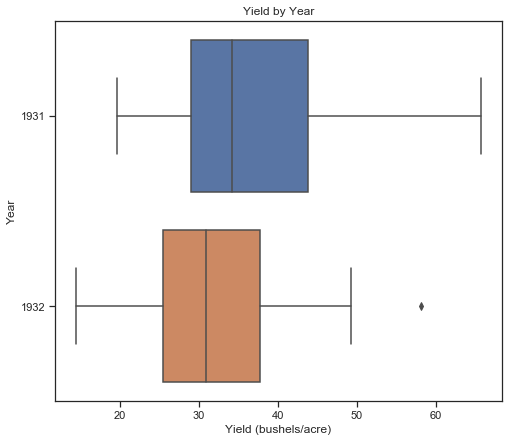

In [273]:
# boxplot to show variation in yield by year
sns.set(rc={'figure.figsize':(8,7)})
sns.set(style="ticks")
ax = sns.boxplot(x="yield", y="year", data=data, palette=None, order = year_order, orient = 'h')
ax.set(xlabel = 'Yield (bushels/acre)', ylabel = 'Year')
plt.title('Yield by Year')
plt.savefig("year_box.png", bbox_inches='tight')

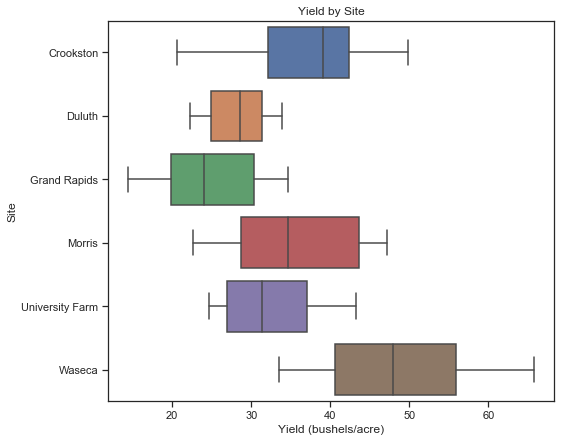

In [274]:
# boxplot to show variation in yield by site
sns.set(rc={'figure.figsize':(8,7)})
sns.set(style="ticks")
ax = sns.boxplot(x="yield", y="site", data=data, palette=None, order = site_order, orient = 'h')
ax.set(xlabel = 'Yield (bushels/acre)', ylabel = 'Site')
plt.title('Yield by Site')
plt.savefig("site_box.png", bbox_inches='tight')

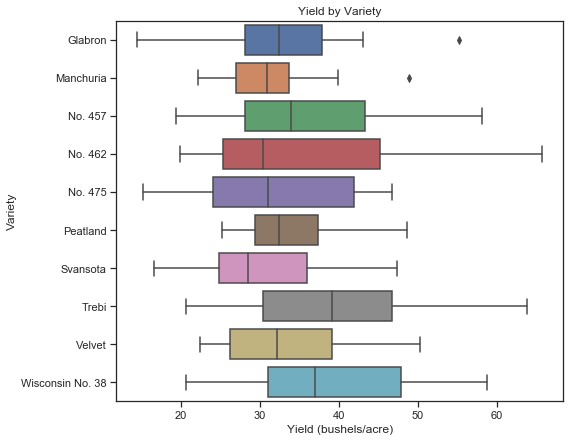

In [272]:
# boxplot to show variation in yield by variety
sns.set(rc={'figure.figsize':(8,7)})
sns.set(style="ticks")
ax = sns.boxplot(x="yield", y="variety", data=data, palette=None, order = variety_order, orient = 'h')
ax.set(xlabel = 'Yield (bushels/acre)', ylabel = 'Variety')
plt.title('Yield by Variety')
plt.savefig("variety_box.png", bbox_inches='tight')

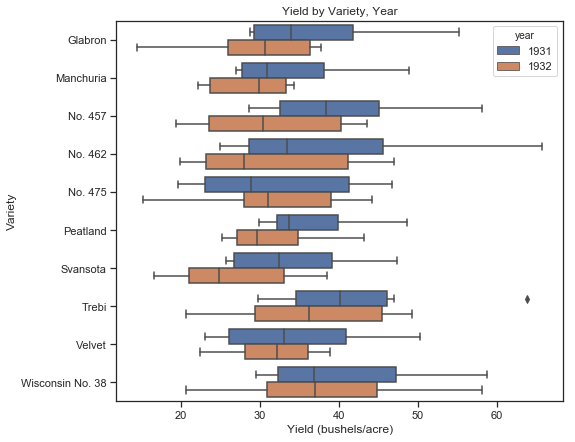

In [239]:
# boxplot to show variation in yield by Variety and Year
sns.set(rc={'figure.figsize':(8,7)})
sns.set(style="ticks")
ax = sns.boxplot(x="yield", y="variety", hue="year", data=data, palette=None, order = variety_order, orient = 'h')
ax.set(xlabel = 'Yield (bushels/acre)', ylabel = 'Variety')
plt.title('Yield by Variety, Year')
plt.savefig("variety_year_box.png", bbox_inches='tight')

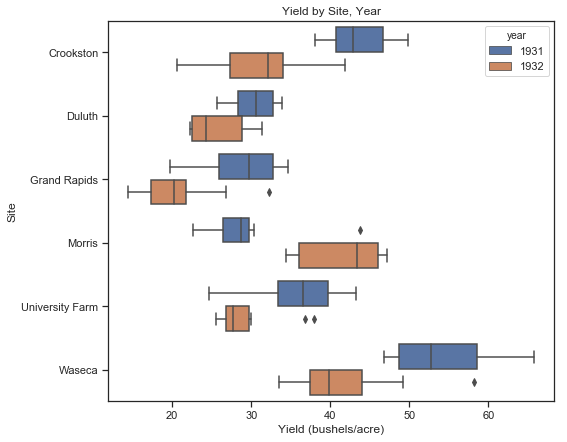

In [240]:
# boxplot to show variation in yield by Site and Year
sns.set(rc={'figure.figsize':(8,7)})
sns.set(style="ticks")
ax = sns.boxplot(x="yield", y="site", hue="year", data=data, palette=None, order = site_order, orient = 'h')
ax.set(xlabel = 'Yield (bushels/acre)', ylabel = 'Site')
plt.title('Yield by Site, Year')
plt.savefig("site_year_box.png", bbox_inches='tight')

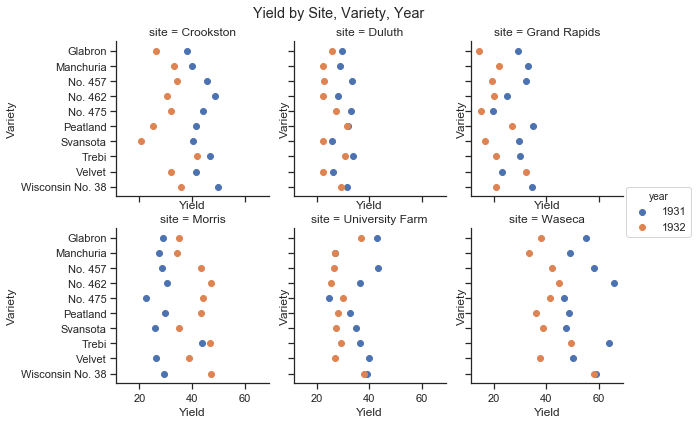

In [244]:
# plot all the data points as a grid
sns.set(style="ticks")
g = sns.FacetGrid(data.sort_values("variety", ascending = False), col="site", col_wrap=3, hue = "year", col_order = site_order, height=3.0)
g.map(plt.scatter, "yield", "variety", alpha=1.0)
g.add_legend(frameon = True)
g.set(ylabel = 'Variety', xlabel = 'Yield')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yield by Site, Variety, Year')
g.savefig("grid.png")

In [220]:
# import some publically available weather data
weather_31 = pd.read_csv("weather_1931.csv")
weather_32 = pd.read_csv('weather_1932.csv')

# join into a single dataframe
weather = pd.concat([weather_31, weather_32], ignore_index=True)

# look at the first few rows
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,EMSN,EMXP,EMXT,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00218692,"WASECA SOUTHERN RESEARCH AND OUTREACH CENTER, ...",44.07070,-93.52640,351.4,1931.0,1034.0,1034.0,90.0,51.0,...,NaN,2.90,100.0,6792.0,6792.0,28.24,NaN,50.8,61.7,39.8
1,USC00215433,"MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US",44.98333,-93.30000,NaN,1931.0,1093.0,1093.0,105.0,50.0,...,5.0,1.27,104.0,6822.0,6822.0,22.07,12.7,50.8,59.4,42.2
2,USC00215638,MORRIS WEST CENTRAL RESEARCH AND OUTREACH CENT...,45.59010,-95.87450,347.5,1931.0,835.0,835.0,66.0,52.0,...,NaN,1.47,106.0,7020.0,7020.0,19.24,NaN,48.0,60.1,35.9
3,USC00211630,"CLOQUET, MN US",46.70539,-92.52391,385.6,1931.0,409.0,409.0,75.0,56.0,...,NaN,2.26,99.0,8647.0,8647.0,28.84,NaN,44.0,55.9,32.2
4,USC00213303,"GRAND RAPIDS FRS LAB, MN US",47.24360,-93.49750,399.3,1931.0,414.0,414.0,99.0,51.0,...,NaN,1.62,99.0,8563.0,8563.0,20.28,NaN,43.9,55.6,32.1


In [ ]:
# select only the relevant weather stations (based on closest lat/long)
some_values = ['CROOKSTON NW EXPERIMENTAL STATION, MN US',
              'CLOQUET, MN US',
              'GRAND RAPIDS FRS LAB, MN US',
              'MORRIS WEST CENTRAL RESEARCH AND OUTREACH CENTER, MN US',
              'MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US',
              'WASECA SOUTHERN RESEARCH AND OUTREACH CENTER, MN US']


weather_subset = weather[['NAME', 'LATITUDE', 'LONGITUDE','DATE','PRCP','TAVG']].loc[weather['NAME'].isin(some_values)]

In [15]:
# check the data type for each column
weather_subset.dtypes

NAME          object
LATITUDE     float64
LONGITUDE    float64
DATE         float64
PRCP         float64
TAVG         float64
dtype: object

In [16]:
# transform DATE into integer
weather_subset = weather_subset.astype({"DATE": int})
weather_subset.dtypes

NAME          object
LATITUDE     float64
LONGITUDE    float64
DATE           int32
PRCP         float64
TAVG         float64
dtype: object

In [17]:
# rename DATE column to YEAR
weather_subset = weather_subset.rename(columns={"DATE": "YEAR"})

In [18]:
# select the relevant locations that match those in the barley dataset
locdict ={
    'CLOQUET, MN US': 'Duluth',
    'CROOKSTON NW EXPERIMENTAL STATION, MN US':'Crookston' ,
    'GRAND RAPIDS FRS LAB, MN US': 'Grand Rapids', 
    'MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US': 'University Farm' ,
    'MORRIS WEST CENTRAL RESEARCH AND OUTREACH CENTER, MN US': 'Morris',
    'WASECA SOUTHERN RESEARCH AND OUTREACH CENTER, MN US': 'Waseca' 
}

In [1]:
weather_subset['site'] = weather_subset['NAME'].map(locdict)
weather_subset

NameError: name 'weather_subset' is not defined

In [20]:
# combine the weather data with the main dataset showing yield
combined = pd.merge(data[['site','year','yield']], weather_subset[['site','YEAR','NAME','PRCP','TAVG']], left_on=['site', 'year'], right_on =['site','YEAR'])
combined[['site','year','PRCP','TAVG','yield']].head()

,site,year,PRCP,TAVG,yield
0,Grand Rapids,1932,28.17,38.7,14.43333
1,Grand Rapids,1932,28.17,38.7,15.23333
2,Grand Rapids,1932,28.17,38.7,16.63333
3,Grand Rapids,1932,28.17,38.7,19.46667
4,Grand Rapids,1932,28.17,38.7,19.90000


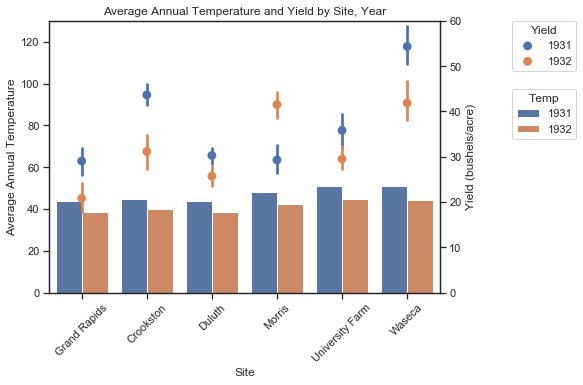

In [282]:
# plot the average temperature and average annual temperature for each year by site
sns.set(rc={'figure.figsize':(7,5)})
sns.set(style="ticks")
ax = sns.barplot(x="site", y="TAVG", hue = 'year', data=combined, palette = None)
plt.legend(bbox_to_anchor=(1.35, 0.75), loc=1, borderaxespad=0., title = 'Temp')
ax.set(ylim=(0, 130))
ax.set(xlabel='Site', ylabel='Average Annual Temperature')
ax2 = plt.twinx()
ax2.set(ylim=(0, 60))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Average Annual Temperature and Yield by Site, Year')
current_palette = sns.color_palette(n_colors = 2)
ax = sns.pointplot(x="site", y="yield", hue = 'year', data=combined, ax=ax2, palette = current_palette, join = False)
plt.legend(bbox_to_anchor=(1.35, 1), loc=1, borderaxespad=0., title = 'Yield')
ax = ax.set(xlabel='Site', ylabel = 'Yield (bushels/acre)')
plt.savefig("temp_yield.png", bbox_inches='tight')

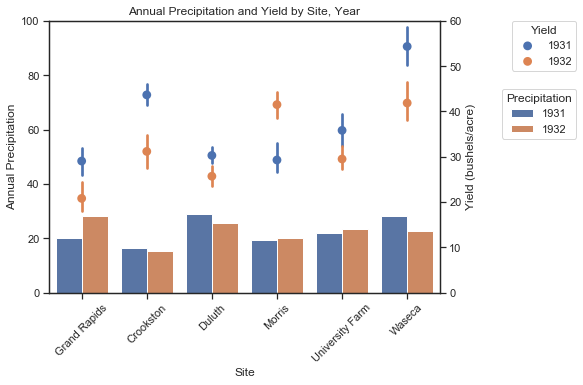

In [286]:
# plot the annual precipitation and average yield for each year by site
sns.set(rc={'figure.figsize':(7,5)})
sns.set(style="ticks")
ax = sns.barplot(x="site", y="PRCP", hue = 'year', data=combined, palette = None)
plt.legend(bbox_to_anchor=(1.35, 0.75), loc=1, borderaxespad=0., title = 'Precipitation')
ax.set(ylim=(0, 100))
ax.set(xlabel='Site', ylabel='Annual Precipitation')
ax2 = plt.twinx()
ax2.set(ylim=(0, 60))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Annual Precipitation and Yield by Site, Year')
current_palette = sns.color_palette(n_colors = 2)
ax = sns.pointplot(x="site", y="yield", hue = 'year', data=combined, ax=ax2, palette = current_palette, join = False)
plt.legend(bbox_to_anchor=(1.35, 1), loc=1, borderaxespad=0., title = 'Yield')
ax = ax.set(xlabel='Site', ylabel = 'Yield (bushels/acre)')
plt.savefig("precip_yield.png", bbox_inches='tight')

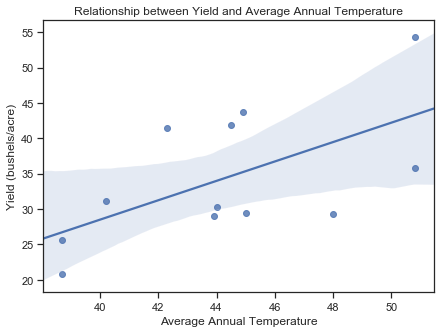

In [257]:
# plot correlation between Average Annual Temperature and Yield for all sites and years
correl =combined[['site','PRCP','TAVG','yield', 'year']].groupby(['site', 'year']).mean()
correl31 = combined.loc[combined['year']==1931]
correl31 = correl31[['site','PRCP','TAVG','yield']].groupby('site').mean()
correl32 = combined.loc[combined['year']==1932]
correl32 = correl32[['site','PRCP','TAVG','yield']].groupby('site').mean()
correl31['year'] = 1931
correl32['year'] = 1932
correl_comb = pd.concat([correl31, correl32])

ax = sns.regplot(x="TAVG", y="yield", data=correl);
#g = sns.lmplot(x="TAVG", y="yield", hue = 'year', data=correl_comb)
plt.title('Relationship between Yield and Average Annual Temperature')
ax.set(xlabel='Average Annual Temperature', ylabel = 'Yield (bushels/acre)')
plt.savefig("yield_temp.png", bbox_inches='tight')

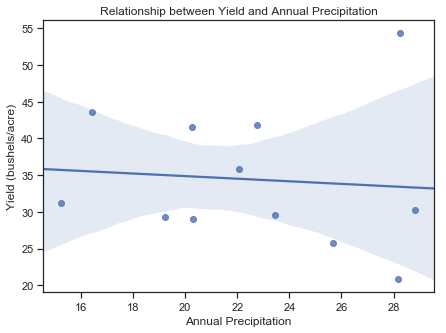

In [287]:
# plot correlation between Average Annual Temperature and Yield for all sites and years

# plot all the data as one set
ax = sns.regplot(x="PRCP", y="yield", data=correl);
ax.set(xlabel = 'Annual Precipitation', ylabel = 'Yield (bushels/acre)')

# plot years as separate colors
#g = sns.lmplot(x="PRCP", y="yield", hue = 'year', data=correl_comb)
plt.title('Relationship between Yield and Annual Precipitation')
plt.savefig("yield_rain.png", bbox_inches='tight')

In [ ]:
# export weather-yields dataframe to CSV
correl_comb.reset_index()
export_csv = correl_comb.to_csv (r'C:\Users\cassa\weather_yields.csv')